In [1]:
#imports

import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Classifying NLP Data for the Service Industry: Comparing 2 Subreddits

## Project Contents:

This project contains 4 notebooks:

|Name|Description|
|---|---|
|1.intro_and_webscrape|Provides an introduction to the project, including problem statement and background, and the code used for gathering the data.|
|2.eda|Displays data cleaning and exploratory data analysis.|
|3.modeling|Builds 4 classification models.|
|4.sentiment_analysis|Explores sentiment analysis of the language used in each subreddit|

You are currently in the notebook #4: Sentiment Analysis, which also contains an [Overall Conclusion](#conclusions). 

In [2]:
# reading in the csv.

df = pd.read_csv('./data/server_retail.csv')

In [3]:
df.head()

,body,subreddit,author,created_utc,comment_length,comment_tokens
0,It's warm out today I think I'll put on my coo...,TalesFromRetail,Princessleiasperiod,1635355229,54,warm today think 'll put coolinator
1,"Yeah, sounds like the customer just chose a we...",TalesFromRetail,Adventurous_Ad_6546,1635354447,151,yeah sounds like customer chose weird way say ...
2,She's insane.,TalesFromRetail,WVPrepper,1635353928,13,insane
3,"That probably would’ve been fine, but that isn...",TalesFromRetail,hazelbutter35,1635353785,306,probably would been fine that what wanted 3 we...
4,But those coupon came from the fact they bough...,TalesFromRetail,matheod,1635353748,158,those coupon came the fact bought lots money w...


In [4]:
#instantiating sentiment analyzer

sia = SentimentIntensityAnalyzer()

In [5]:
#Getting polarity scores for each comment. 

scores = []

for each in df['body']:
    current_scores = sia.polarity_scores(each)
    scores.append(current_scores)



In [6]:
#saving scores as a dataframe
scores_df = pd.DataFrame(scores)

In [7]:
scores_df.head()

,neg,neu,pos,compound
0,0.000,0.826,0.174,0.2263
1,0.112,0.732,0.156,0.3257
2,0.730,0.270,0.000,-0.4019
3,0.000,0.975,0.025,0.1027
4,0.209,0.791,0.000,-0.8125


In [8]:
# creating a dataframe with polarity scores appended as columns. 

polarity_df = pd.concat([df, scores_df], axis = 1)
polarity_df.head()

,body,subreddit,author,created_utc,comment_length,comment_tokens,neg,neu,pos,compound
0,It's warm out today I think I'll put on my coo...,TalesFromRetail,Princessleiasperiod,1635355229,54,warm today think 'll put coolinator,0.000,0.826,0.174,0.2263
1,"Yeah, sounds like the customer just chose a we...",TalesFromRetail,Adventurous_Ad_6546,1635354447,151,yeah sounds like customer chose weird way say ...,0.112,0.732,0.156,0.3257
2,She's insane.,TalesFromRetail,WVPrepper,1635353928,13,insane,0.730,0.270,0.000,-0.4019
3,"That probably would’ve been fine, but that isn...",TalesFromRetail,hazelbutter35,1635353785,306,probably would been fine that what wanted 3 we...,0.000,0.975,0.025,0.1027
4,But those coupon came from the fact they bough...,TalesFromRetail,matheod,1635353748,158,those coupon came the fact bought lots money w...,0.209,0.791,0.000,-0.8125


In [9]:
#Sentiment fairly consistent between retail and sales

polarity_df['compound'].groupby(polarity_df['subreddit']=='TalesFromRetail').describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
False,38446.0,0.077217,0.530126,-0.9994,-0.3182,0.0,0.5106,0.9985
True,33459.0,0.055874,0.496004,-0.9967,-0.3053,0.0,0.4404,0.9954


In [10]:
retail_sent = polarity_df[polarity_df['subreddit'] == 'TalesFromRetail']

In [11]:
server_sent = polarity_df[polarity_df['subreddit'] == 'TalesFromYourServer']

## Sentiment Analysis Conclusions

Surprisingly, the majority of comments were neutral.  Both subreddits had extreme outliers of a perfect positive or negative score, but most comments fell between a -.25 score or a positive .5 score. 

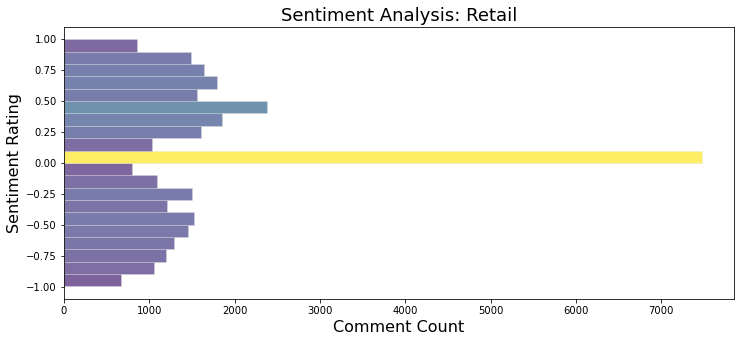

In [12]:
#I consulted this site for this code: https://medium.com/@arseniytyurin/how-to-make-your-histogram-shine-69e432be39ca

plt.figure(figsize=(12, 5))
n, bins, patches = plt.hist(retail_sent['compound'], orientation='horizontal', bins=20, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.title('Sentiment Analysis: Retail', fontsize=18)
plt.xlabel('Comment Count', fontsize=16)
plt.ylabel('Sentiment Rating', fontsize=16)
plt.show()

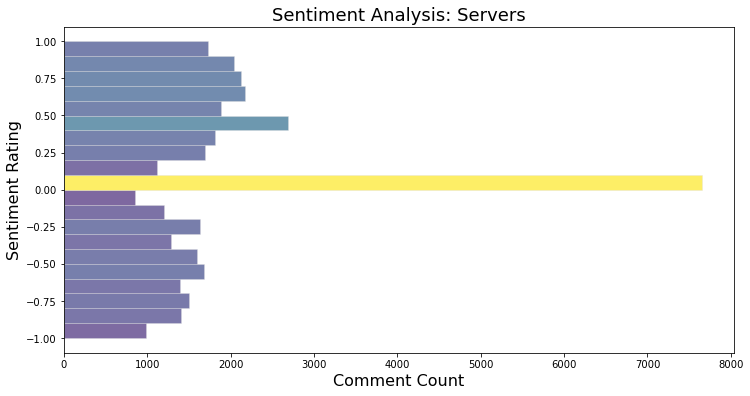

In [13]:
#I consulted this site for this code: https://medium.com/@arseniytyurin/how-to-make-your-histogram-shine-69e432be39ca

plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(server_sent['compound'], orientation='horizontal', bins=20, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.title('Sentiment Analysis: Servers', fontsize=18)
plt.xlabel('Comment Count', fontsize=16)
plt.ylabel('Sentiment Rating', fontsize=16)
plt.show()

Text(0.5, 0, 'Subreddit')

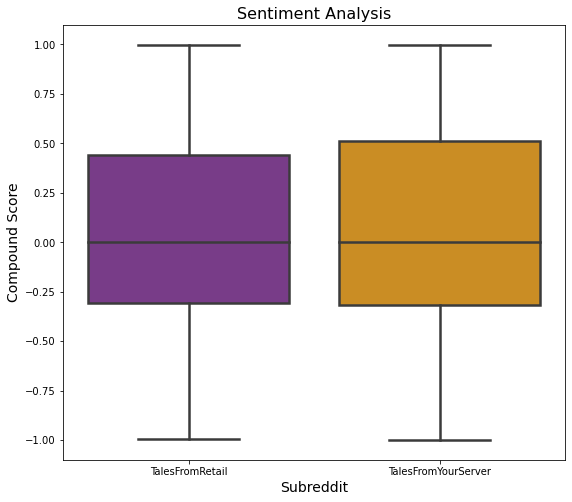

In [14]:
plt.figure(figsize=(9, 8))
sns.boxplot(x="subreddit", y="compound",
                 data=polarity_df, linewidth=2.5, palette='CMRmap')
plt.title('Sentiment Analysis', fontsize=16)
plt.ylabel('Compound Score',fontsize=14)
plt.xlabel('Subreddit', fontsize=14)

## <a name="conclusions"></a>Overall Conclusions
* The model is able to differentiate between the TalesFromYourServer and the TalesFromRetail subreddits with about 80% accuracy.
* Generally, the sentiment from both groups is fairly neutral.
* Based on top word usage, it would appear that things like tips, food, and tables are important to servers, while things like customers are important to both servers and retail workers.


Since the bulk of the comments were neutral in nature, I didn’t get a good feel for what workers are looking for that their employers may be able to provide.  Given more time, I would focus on breaking down comments to look at the 25% most negative and most positive.  This way we could get a better idea of negative and positive things that workers are discussing, while avoiding the noise of the bulk of the neutral comments